In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from IPython.display import display
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None 

In [116]:
firstd2015 = pd.read_csv("/Users/barborostasdemir/Desktop/Final-Case-2/Mutluluk Project/yıllar/2015.csv", low_memory=False)

#Bu low_memory uyarısını almanızın nedeni, her sütun için türleri tahmin etmenin çok bellek gerektirmesidir
#Herbir 

In [117]:
firstd2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [118]:
firstd2015.columns # sütunların ne olduğunu göremek için

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [119]:
firstd2015.columns = firstd2015.columns.str.replace(' ','_')
# sütun isimlendirmede boşluk olan değerlerin altına tire koyduk.

In [120]:
firstd2015.columns

Index(['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'Standard_Error', 'Economy_(GDP_per_Capita)', 'Family',
       'Health_(Life_Expectancy)', 'Freedom', 'Trust_(Government_Corruption)',
       'Generosity', 'Dystopia_Residual'],
      dtype='object')

In [121]:
firstd2015.shape

(158, 12)

In [122]:
firstd2015.dtypes

Country                           object
Region                            object
Happiness_Rank                     int64
Happiness_Score                  float64
Standard_Error                   float64
Economy_(GDP_per_Capita)         float64
Family                           float64
Health_(Life_Expectancy)         float64
Freedom                          float64
Trust_(Government_Corruption)    float64
Generosity                       float64
Dystopia_Residual                float64
dtype: object

In [123]:
firstd2015.isnull().sum()
#Gördüğümüz üzere hiç null değerimiz yok "sum()" toplam değerini aldık.

Country                          0
Region                           0
Happiness_Rank                   0
Happiness_Score                  0
Standard_Error                   0
Economy_(GDP_per_Capita)         0
Family                           0
Health_(Life_Expectancy)         0
Freedom                          0
Trust_(Government_Corruption)    0
Generosity                       0
Dystopia_Residual                0
dtype: int64

In [124]:
firstd2015=firstd2015.rename(columns={"Economy_(GDP_per_Capita)":"Economy","Health_(Life_Expectancy)":"Life_Expectancy",
                      "Trust_(Government_Corruption)":"Government_Corruption",
                      "Happiness_Rank":"Rank"
                      })

# Sütun isimlerini düzenlenmesi gereken verileri daha düzenli hale getirdik.

In [125]:
firstd2015.columns

Index(['Country', 'Region', 'Rank', 'Happiness_Score', 'Standard_Error',
       'Economy', 'Family', 'Life_Expectancy', 'Freedom',
       'Government_Corruption', 'Generosity', 'Dystopia_Residual'],
      dtype='object')

## Mutluluk Sıralamsı

In [126]:
len(firstd2015["Country"].unique())
# unique yapmamsın temel sebebi ülke tekararı var ise sadece bir tanesini almak

158

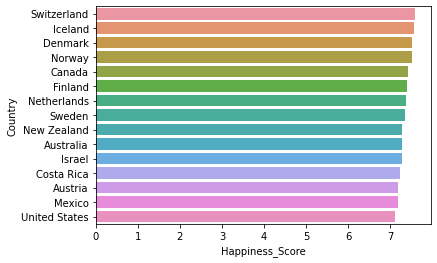

In [127]:
sns.barplot(y=firstd2015["Country"][:15], x = firstd2015["Happiness_Score"][:15]);
#Mutluluk sıralamasına göre ilk 15'e giren ülkeler

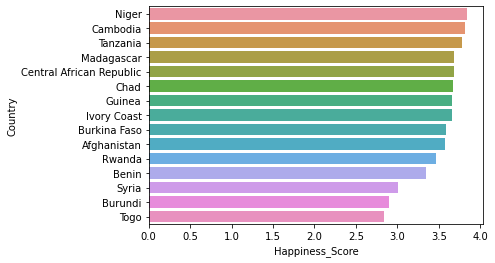

In [128]:
sns.barplot(y=firstd2015["Country"][-15:], x = firstd2015["Happiness_Score"][-15:]);
#Mutluluk sıralamasına göre son 15'e giren ülkeler

In [129]:
firstd2015_turkiye = firstd2015[firstd2015["Country"]=="Turkey"]
firstd2015_turkiye

#2015 yılında türkiye ilk 76'ya girmiştir.

,Country,Region,Rank,Happiness_Score,Standard_Error,Economy,Family,Life_Expectancy,Freedom,Government_Corruption,Generosity,Dystopia_Residual
75,Turkey,Middle East and Northern Africa,76,5.332,0.03864,1.06098,0.94632,0.73172,0.22815,0.15746,0.12253,2.08528


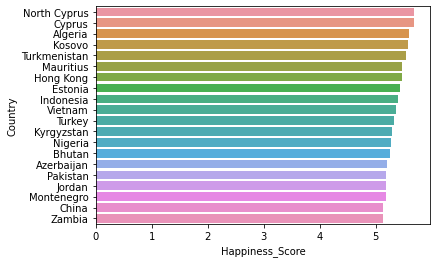

In [130]:
sns.barplot(y = firstd2015["Country"][65:85], x = firstd2015["Happiness_Score"][65:85]);
# Türkiyenin olduğu sıralamaya bakıyoruz.


## Yıllara göre mutluluğu bir çok duruma göre analiz

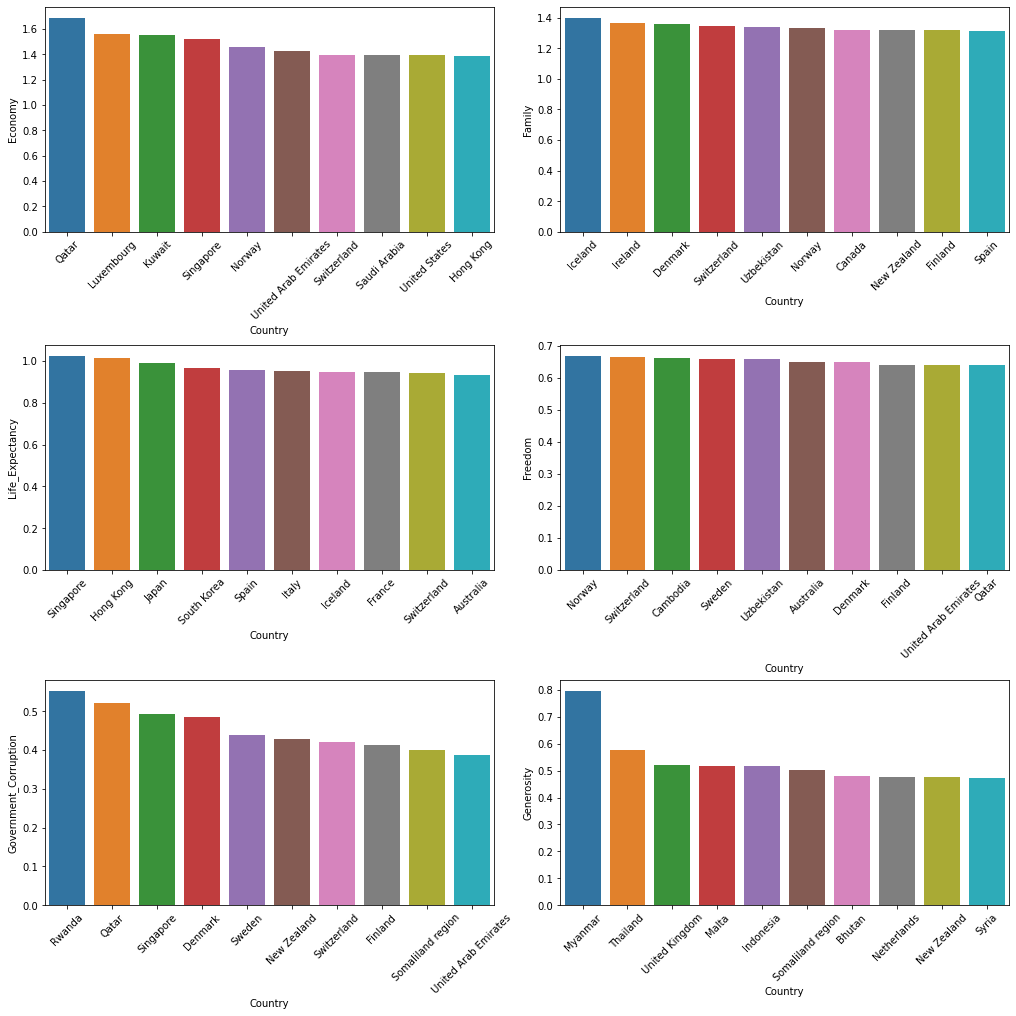

In [131]:
f, axs = plt.subplots(3,2, figsize = (14,14), constrained_layout = True)

sort_eco = firstd2015.sort_values(by = ['Economy'], ascending = False)
sort_eco = sort_eco.head(10)
sort_fa = firstd2015.sort_values(by = ['Family'], ascending = False)
sort_fa = sort_fa.head(10)
sort_he = firstd2015.sort_values(by = ['Life_Expectancy'], ascending = False)
sort_he = sort_he.head(10)
sort_free = firstd2015.sort_values(by = ['Freedom'], ascending = False)
sort_free = sort_free.head(10)
sort_gc = firstd2015.sort_values(by = ['Government_Corruption'], ascending = False)
sort_gc = sort_gc.head(10)
sort_genero = firstd2015.sort_values(by = ['Generosity'], ascending = False)
sort_genero = sort_genero.head(10)

ax=sns.barplot(x="Country", y="Economy", data=sort_eco, ax = axs[0, 0])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Country",y="Family", data=sort_fa, ax = axs[0, 1])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Country",y="Life_Expectancy", data=sort_he, ax = axs[1, 0])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Country",y="Freedom", data=sort_free, ax = axs[1, 1])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Country",y="Government_Corruption", data = sort_gc, ax = axs[2, 0])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Country",y="Generosity", data=sort_genero, ax = axs[2, 1])
ax.tick_params(axis = 'x', rotation = 45)



# Diğer Yıllar

In [132]:
secondd2016 = pd.read_csv("/Users/barborostasdemir/Desktop/Final-Case-2/Mutluluk Project/yıllar/2016.csv", low_memory=False)
thirdd2017 = pd.read_csv("/Users/barborostasdemir/Desktop/Final-Case-2/Mutluluk Project/yıllar/2017.csv", low_memory=False) 
fourthd2018 = pd.read_csv("/Users/barborostasdemir/Desktop/Final-Case-2/Mutluluk Project/yıllar/2017.csv", low_memory=False) 
fifthd2019 = pd.read_csv("/Users/barborostasdemir/Desktop/Final-Case-2/Mutluluk Project/yıllar/2017.csv", low_memory=False) 

In [133]:
secondd2016.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [134]:
secondd2016.columns = secondd2016.columns.str.replace(' ','_')

In [135]:
secondd2016=secondd2016.rename(columns={"Economy_(GDP_per_Capita)":"Economy","Health_(Life_Expectancy)":"Life_Expectancy",
                      "Trust_(Government_Corruption)":"Government_Corruption","Happiness_Rank":"Rank"
                      })

In [136]:
secondd2016.columns

Index(['Country', 'Region', 'Rank', 'Happiness_Score',
       'Lower_Confidence_Interval', 'Upper_Confidence_Interval', 'Economy',
       'Family', 'Life_Expectancy', 'Freedom', 'Government_Corruption',
       'Generosity', 'Dystopia_Residual'],
      dtype='object')

In [137]:
secondd2016.head(15)

,Country,Region,Rank,Happiness_Score,Lower_Confidence_Interval,Upper_Confidence_Interval,Economy,Family,Life_Expectancy,Freedom,Government_Corruption,Generosity,Dystopia_Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
5,Canada,North America,6,7.404,7.335,7.473,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485
6,Netherlands,Western Europe,7,7.339,7.284,7.394,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416,2.70749
7,New Zealand,Australia and New Zealand,8,7.334,7.264,7.404,1.36066,1.17278,0.83096,0.58147,0.41904,0.49401,2.47553
8,Australia,Australia and New Zealand,9,7.313,7.241,7.385,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407,2.54650
9,Sweden,Western Europe,10,7.291,7.227,7.355,1.45181,1.08764,0.83121,0.58218,0.40867,0.38254,2.54734


In [138]:
thirdd2017.columns = thirdd2017.columns.str.replace('.','_')

In [139]:
thirdd2017.columns = thirdd2017.columns.str.replace('__','_')

In [140]:
thirdd2017.columns

Index(['Country', 'Happiness_Rank', 'Happiness_Score', 'Whisker_high',
       'Whisker_low', 'Economy_GDP_per_Capita_', 'Family',
       'Health_Life_Expectancy_', 'Freedom', 'Generosity',
       'Trust_Government_Corruption_', 'Dystopia_Residual'],
      dtype='object')

In [141]:
thirdd2017=thirdd2017.rename(columns={"Economy_GDP_per_Capita_":"Economy","Health_Life_Expectancy_":"Life_Expectancy",
                      "Trust_Government_Corruption_":"Government_Corruption","Happiness_Rank":"Rank"
                      })

In [142]:
thirdd2017.columns

Index(['Country', 'Rank', 'Happiness_Score', 'Whisker_high', 'Whisker_low',
       'Economy', 'Family', 'Life_Expectancy', 'Freedom', 'Generosity',
       'Government_Corruption', 'Dystopia_Residual'],
      dtype='object')

In [143]:
fourthd2018.columns # Asılında kısaca burda ne yapmak istediğimizi çok açık bir şekilde belirtiyoruz.

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [144]:
fourthd2018.columns = fourthd2018.columns.str.replace(' ','_')

In [145]:
fourthd2018.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [146]:
fourthd2018.head(15)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
5,Netherlands,6,7.377,7.427426,7.326574,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804
6,Canada,7,7.316,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264
7,New Zealand,8,7.314,7.379510,7.248490,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456
8,Sweden,9,7.284,7.344095,7.223905,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538
9,Australia,10,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211


In [147]:
fourthd2018.columns=fourthd2018.columns.str.replace('.','_')

In [148]:
fourthd2018.columns

Index(['Country', 'Happiness_Rank', 'Happiness_Score', 'Whisker_high',
       'Whisker_low', 'Economy__GDP_per_Capita_', 'Family',
       'Health__Life_Expectancy_', 'Freedom', 'Generosity',
       'Trust__Government_Corruption_', 'Dystopia_Residual'],
      dtype='object')

In [149]:
fourthd2018=fourthd2018.rename(columns={"Country_or_region":"Country","GDP_per_capita":"Economy",
                        "Healthy_life_expectancy":"Life_Expectancy",
                      "Score":"Happiness_Score","Overall_rank":"Rank"
                      })

In [150]:
fourthd2018.columns

Index(['Country', 'Happiness_Rank', 'Happiness_Score', 'Whisker_high',
       'Whisker_low', 'Economy__GDP_per_Capita_', 'Family',
       'Health__Life_Expectancy_', 'Freedom', 'Generosity',
       'Trust__Government_Corruption_', 'Dystopia_Residual'],
      dtype='object')

In [151]:
fourthd2018.head(15)

,Country,Happiness_Rank,Happiness_Score,Whisker_high,Whisker_low,Economy__GDP_per_Capita_,Family,Health__Life_Expectancy_,Freedom,Generosity,Trust__Government_Corruption_,Dystopia_Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
5,Netherlands,6,7.377,7.427426,7.326574,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804
6,Canada,7,7.316,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264
7,New Zealand,8,7.314,7.379510,7.248490,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456
8,Sweden,9,7.284,7.344095,7.223905,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538
9,Australia,10,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211


In [152]:
fifthd2019.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [153]:
fifthd2019.columns=fifthd2019.columns.str.replace('.','_')

In [154]:
fifthd2019.columns

Index(['Country', 'Happiness_Rank', 'Happiness_Score', 'Whisker_high',
       'Whisker_low', 'Economy__GDP_per_Capita_', 'Family',
       'Health__Life_Expectancy_', 'Freedom', 'Generosity',
       'Trust__Government_Corruption_', 'Dystopia_Residual'],
      dtype='object')

In [155]:
fifthd2019 = fifthd2019.rename(columns={"Country_or_region":"Country","GDP_per_capita":"Economy",
                        "Healthy_life_expectancy":"Life_Expectancy",
                      "Score":"Happiness_Score","Overall_rank":"Rank"
                      })

In [156]:
fifthd2019.columns

Index(['Country', 'Happiness_Rank', 'Happiness_Score', 'Whisker_high',
       'Whisker_low', 'Economy__GDP_per_Capita_', 'Family',
       'Health__Life_Expectancy_', 'Freedom', 'Generosity',
       'Trust__Government_Corruption_', 'Dystopia_Residual'],
      dtype='object')

In [157]:
fifthd2019.head(10)

,Country,Happiness_Rank,Happiness_Score,Whisker_high,Whisker_low,Economy__GDP_per_Capita_,Family,Health__Life_Expectancy_,Freedom,Generosity,Trust__Government_Corruption_,Dystopia_Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
5,Netherlands,6,7.377,7.427426,7.326574,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804
6,Canada,7,7.316,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264
7,New Zealand,8,7.314,7.379510,7.248490,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456
8,Sweden,9,7.284,7.344095,7.223905,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538
9,Australia,10,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211


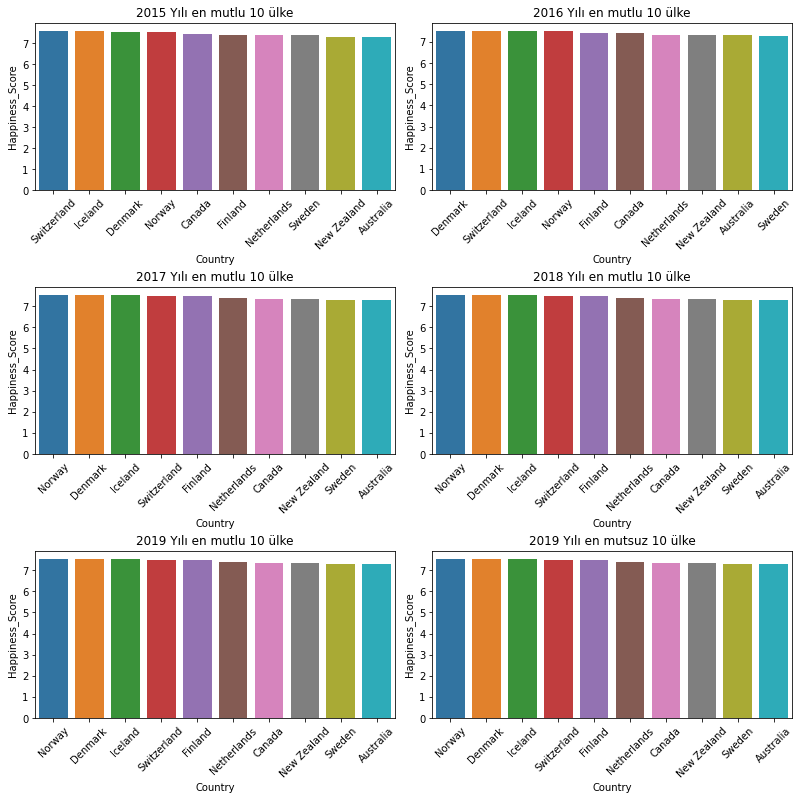

In [163]:
sort_secondd = secondd2016.head(10)
sort_thirdd = thirdd2017.head(10)
sort_fourthd = fourthd2018.head(10)
sort_fifthd = fifthd2019.head(10)
sort_first = firstd2015.head(10)
sad_fifthd = fifthd2019.tail(10)
f, axs = plt.subplots(3,2, figsize = (11,11), constrained_layout = True)
ax=sns.barplot(x="Country", y="Happiness_Score", data=sort_first , ax = axs[0, 0])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Country",y="Happiness_Score", data=sort_secondd, ax = axs[0, 1])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Country",y="Happiness_Score", data=sort_thirdd, ax = axs[1, 0])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Country",y="Happiness_Score", data=sort_fourthd, ax = axs[1, 1])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Country",y="Happiness_Score", data =sort_fifthd, ax = axs[2, 0])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Country",y="Happiness_Score", data =sort_fifthd, ax = axs[2, 1])
ax.tick_params(axis = 'x', rotation = 45)
axs[0, 0].title.set_text('2015 Yılı en mutlu 10 ülke')
axs[0, 1].title.set_text('2016 Yılı en mutlu 10 ülke')
axs[1, 0].title.set_text('2017 Yılı en mutlu 10 ülke')
axs[1, 1].title.set_text('2018 Yılı en mutlu 10 ülke')
axs[2, 0].title.set_text('2019 Yılı en mutlu 10 ülke')
axs[2, 1].title.set_text('2019 Yılı en mutsuz 10 ülke')